In [1]:
import pandas as pd
from glob import glob

df_raw = pd.read_csv(r"Samsung Health\samsunghealth_juliamgebara_20251215221761\com.samsung.shealth.tracker.heart_rate.20251215221761.csv", sep=';', encoding="utf-8")

df_raw.head()

,"com.samsung.shealth.tracker.heart_rate,6307003,3"
0,",source,tag_id,com.samsung.health.heart_rate.c..."
1,",21312,62981551,1,2025-11-12 14:03:02.880,,,62..."
2,",21312,62981551,1,2025-11-12 14:06:58.284,,,62..."
3,",21312,62981551,1,2025-11-12 16:26:49.104,,,62..."
4,",21312,62981551,1,2025-11-12 17:06:00.332,,,62..."


##### Difícil entender as colunas. Será que a primeira linha é continuação do nome delas? Vamos modificar o método de leitura do arquivo.

In [2]:
df_raw = pd.read_csv(r"Samsung Health\samsunghealth_juliamgebara_20251215221761\com.samsung.shealth.tracker.heart_rate.20251215221761.csv", sep=',', skiprows=1,skipinitialspace=1)

df_raw.head()

,Unnamed: 0,source,tag_id,com.samsung.health.heart_rate.create_sh_ver,com.samsung.health.heart_rate.heart_beat_count,com.samsung.health.heart_rate.start_time,com.samsung.health.heart_rate.custom,com.samsung.health.heart_rate.binning_data,com.samsung.health.heart_rate.modify_sh_ver,com.samsung.health.heart_rate.update_time,...,com.samsung.health.heart_rate.max,com.samsung.health.heart_rate.min,com.samsung.health.heart_rate.client_data_ver,com.samsung.health.heart_rate.time_offset,com.samsung.health.heart_rate.deviceuuid,com.samsung.health.heart_rate.comment,com.samsung.health.heart_rate.pkg_name,com.samsung.health.heart_rate.end_time,com.samsung.health.heart_rate.datauuid,com.samsung.health.heart_rate.heart_rate
0,NaN,21312,62981551.0,1,2025-11-12 14:03:02.880,NaN,NaN,62981551.0,2025-11-12 14:03:03.934,2025-11-12 14:03:03.934,...,NaN,NaN,UTC-0300,9cX1oNetDs,NaN,com.sec.android.app.shealth,2025-11-12 14:03:02.880,12d8294b-e6e6-4108-995b-bc998b92485d,123.0,NaN
1,NaN,21312,62981551.0,1,2025-11-12 14:06:58.284,NaN,NaN,62981551.0,2025-11-12 14:14:02.406,2025-11-12 14:14:02.406,...,NaN,NaN,UTC-0300,9cX1oNetDs,NaN,com.sec.android.app.shealth,2025-11-12 14:06:58.284,bbdc2044-2d85-4562-9808-91de241b9a2b,77.0,NaN
2,NaN,21312,62981551.0,1,2025-11-12 16:26:49.104,NaN,NaN,62981551.0,2025-11-12 16:35:00.099,2025-11-12 16:35:00.099,...,NaN,NaN,UTC-0300,9cX1oNetDs,NaN,com.sec.android.app.shealth,2025-11-12 16:26:49.104,fa121816-c833-49d8-946a-1c3db178f96e,91.0,NaN
3,NaN,21312,62981551.0,1,2025-11-12 17:06:00.332,NaN,NaN,62981551.0,2025-11-12 17:15:00.025,2025-11-12 17:15:00.025,...,NaN,NaN,UTC-0300,9cX1oNetDs,NaN,com.sec.android.app.shealth,2025-11-12 17:06:00.332,b5cd1647-fffa-4af6-867c-5477d4ada3fc,91.0,NaN
4,NaN,21312,62981551.0,1,2025-11-12 17:35:57.258,NaN,NaN,62981551.0,2025-11-12 17:45:03.291,2025-11-12 17:45:03.291,...,NaN,NaN,UTC-0300,9cX1oNetDs,NaN,com.sec.android.app.shealth,2025-11-12 17:35:57.258,99783445-4ac0-4cff-bc8c-a128f29cfe0c,89.0,NaN


##### Agora sim! Vejamos quais colunas são realmente úteis.

In [3]:
df_selecionadas = df_raw[['com.samsung.health.heart_rate.heart_beat_count', 'com.samsung.health.heart_rate.datauuid','com.samsung.health.heart_rate.heart_rate']]

df_selecionadas.head(20)

,com.samsung.health.heart_rate.heart_beat_count,com.samsung.health.heart_rate.datauuid,com.samsung.health.heart_rate.heart_rate
0,2025-11-12 14:03:02.880,123.0,NaN
1,2025-11-12 14:06:58.284,77.0,NaN
2,2025-11-12 16:26:49.104,91.0,NaN
3,2025-11-12 17:06:00.332,91.0,NaN
4,2025-11-12 17:35:57.258,89.0,NaN
5,2025-11-12 20:50:19.838,105.0,NaN
6,2025-11-12 20:00:00.000,109.0,NaN
7,2025-11-12 21:00:00.000,95.0,NaN
8,2025-11-12 21:40:34.737,101.0,NaN
9,2025-11-12 21:50:39.685,99.0,NaN


##### A última coluna parece ser a única que faz referência direta às batidas cardíacas, mas tem muitos valores em branco. Quantos?

<Axes: >

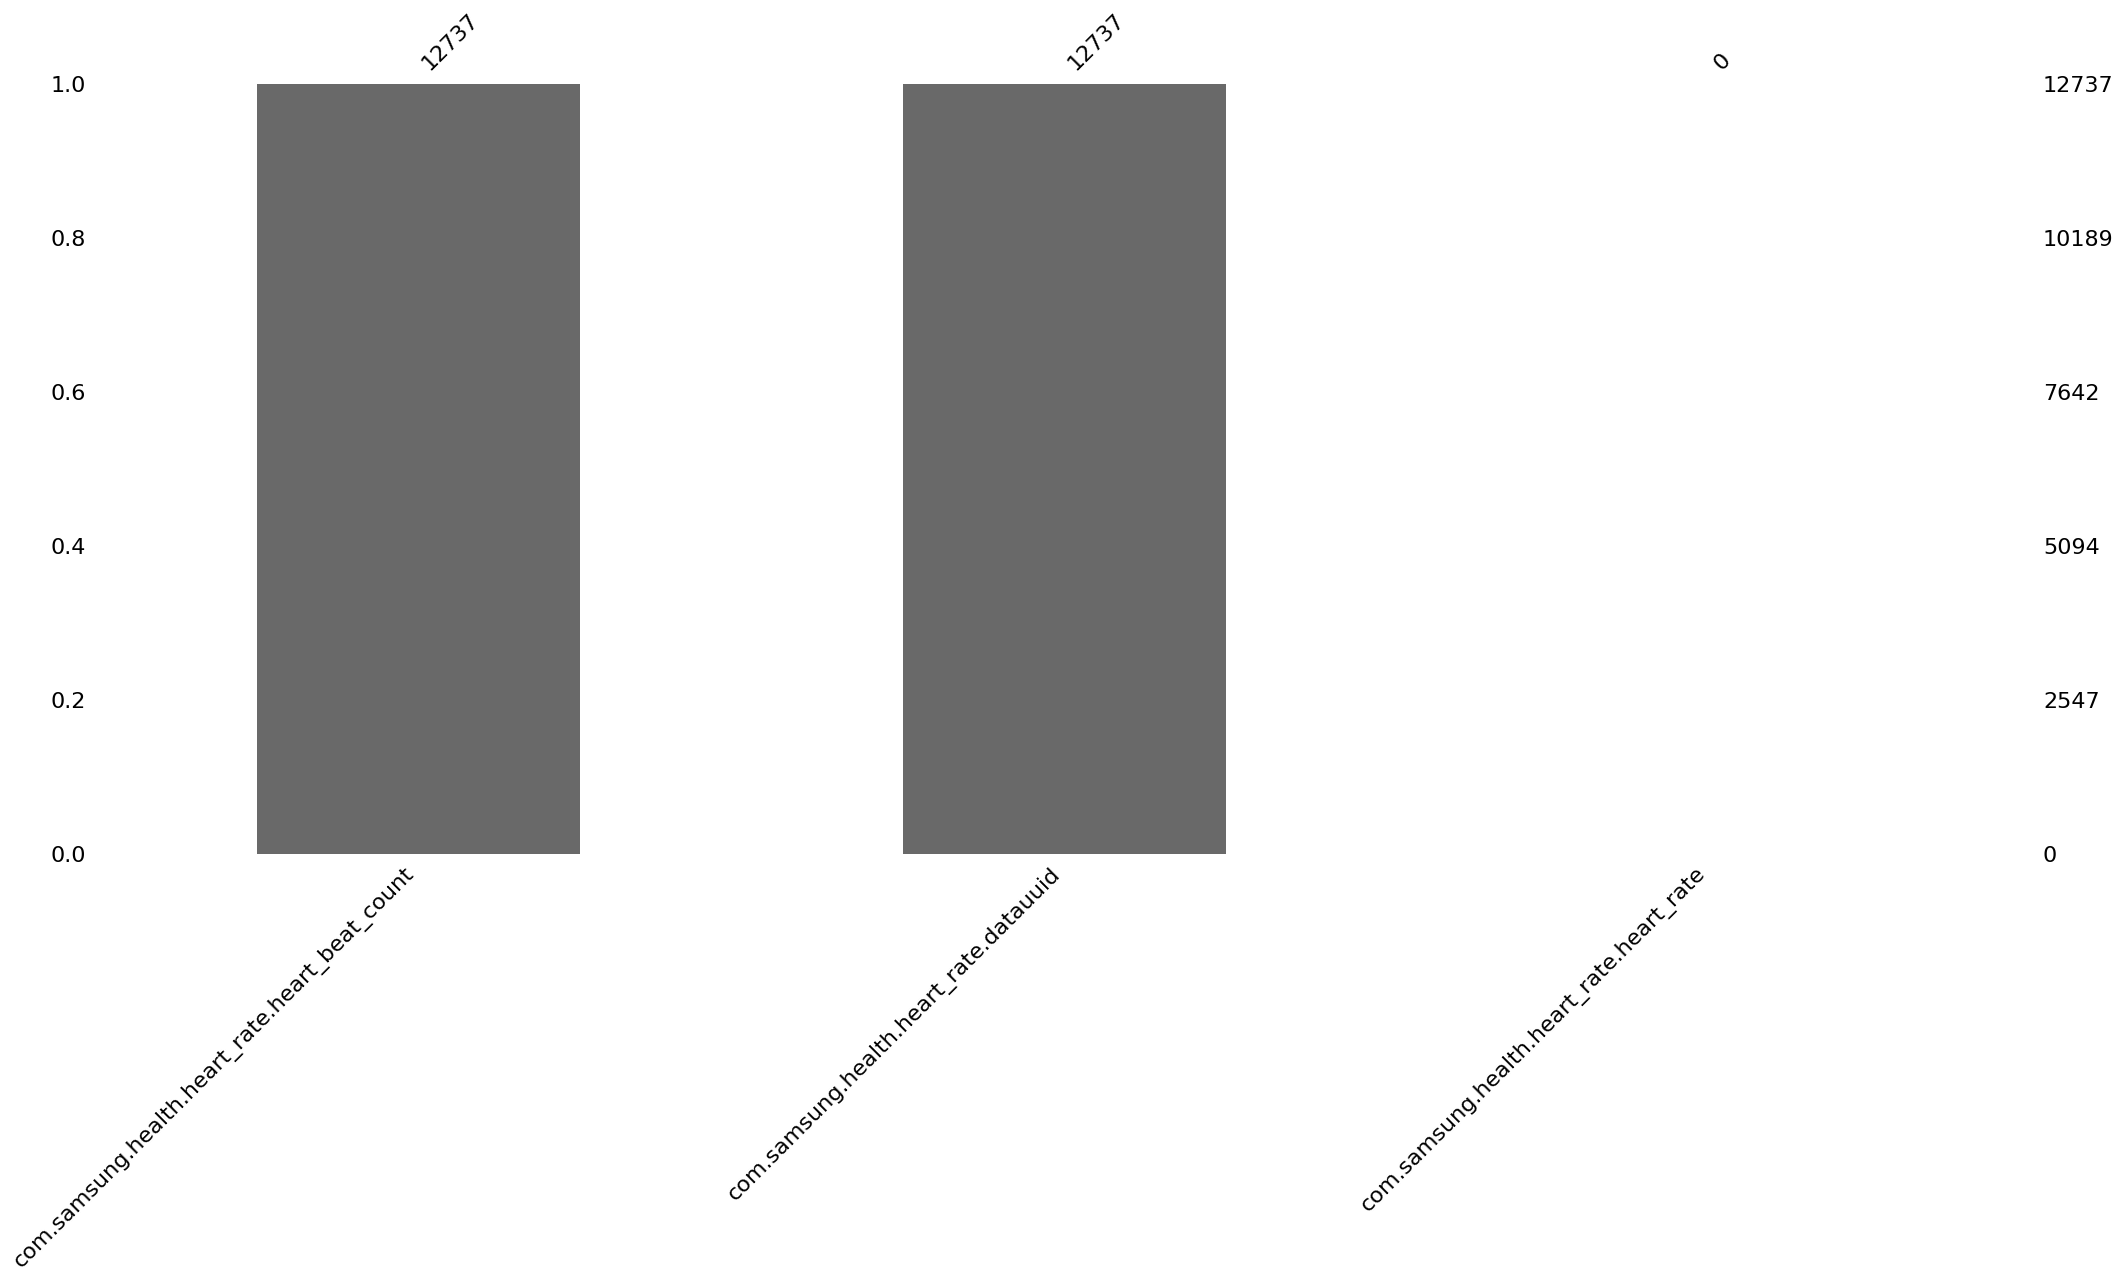

In [4]:
import missingno as msno

msno.bar(df_selecionadas)

##### Voltando a ver as colunas da df_raw, parece haver um padrão: o nome das colunas está deslocado para a direita. A primeira, na realidade, não existe. Vamos voltar a ela e corrigir isso.

In [5]:
df_raw2 = df_raw.dropna(axis=1, how="all")
df_raw2.columns = df_raw2.columns.str.strip()

df_raw2.head()

,source,tag_id,com.samsung.health.heart_rate.create_sh_ver,com.samsung.health.heart_rate.heart_beat_count,com.samsung.health.heart_rate.custom,com.samsung.health.heart_rate.binning_data,com.samsung.health.heart_rate.modify_sh_ver,com.samsung.health.heart_rate.update_time,com.samsung.health.heart_rate.client_data_id,com.samsung.health.heart_rate.max,com.samsung.health.heart_rate.client_data_ver,com.samsung.health.heart_rate.time_offset,com.samsung.health.heart_rate.comment,com.samsung.health.heart_rate.pkg_name,com.samsung.health.heart_rate.end_time,com.samsung.health.heart_rate.datauuid
0,21312,62981551.0,1,2025-11-12 14:03:02.880,NaN,62981551.0,2025-11-12 14:03:03.934,2025-11-12 14:03:03.934,NaN,NaN,UTC-0300,9cX1oNetDs,com.sec.android.app.shealth,2025-11-12 14:03:02.880,12d8294b-e6e6-4108-995b-bc998b92485d,123.0
1,21312,62981551.0,1,2025-11-12 14:06:58.284,NaN,62981551.0,2025-11-12 14:14:02.406,2025-11-12 14:14:02.406,NaN,NaN,UTC-0300,9cX1oNetDs,com.sec.android.app.shealth,2025-11-12 14:06:58.284,bbdc2044-2d85-4562-9808-91de241b9a2b,77.0
2,21312,62981551.0,1,2025-11-12 16:26:49.104,NaN,62981551.0,2025-11-12 16:35:00.099,2025-11-12 16:35:00.099,NaN,NaN,UTC-0300,9cX1oNetDs,com.sec.android.app.shealth,2025-11-12 16:26:49.104,fa121816-c833-49d8-946a-1c3db178f96e,91.0
3,21312,62981551.0,1,2025-11-12 17:06:00.332,NaN,62981551.0,2025-11-12 17:15:00.025,2025-11-12 17:15:00.025,NaN,NaN,UTC-0300,9cX1oNetDs,com.sec.android.app.shealth,2025-11-12 17:06:00.332,b5cd1647-fffa-4af6-867c-5477d4ada3fc,91.0
4,21312,62981551.0,1,2025-11-12 17:35:57.258,NaN,62981551.0,2025-11-12 17:45:03.291,2025-11-12 17:45:03.291,NaN,NaN,UTC-0300,9cX1oNetDs,com.sec.android.app.shealth,2025-11-12 17:35:57.258,99783445-4ac0-4cff-bc8c-a128f29cfe0c,89.0


In [6]:
df_selecionadas = df_raw2[['com.samsung.health.heart_rate.heart_beat_count', 'com.samsung.health.heart_rate.datauuid','com.samsung.health.heart_rate.heart_rate']]

df_selecionadas.head(20)

KeyError: "['com.samsung.health.heart_rate.heart_rate'] not in index"

##### As colunas permanecem deslocadas. Parece que o que causa isso são vírgulas no início e no fim de cada linha do arquivo original.

In [7]:
df_raw3 = pd.read_csv(
        r"Samsung Health\samsunghealth_juliamgebara_20251215221761\com.samsung.shealth.tracker.heart_rate.20251215221761.csv",
        sep=",",
        skiprows=1)
        
df_raw3 = df_raw3.iloc[:, 1:]

 # Fix missing last column name (trailing comma case)
if pd.isna(df_raw3.columns[-1]):
    df_raw3 = df_raw3.rename(
    columns={df_raw3.columns[-1]: "com.samsung.health.heart_rate.value"}
)

df_raw3

,source,tag_id,com.samsung.health.heart_rate.create_sh_ver,com.samsung.health.heart_rate.heart_beat_count,com.samsung.health.heart_rate.start_time,com.samsung.health.heart_rate.custom,com.samsung.health.heart_rate.binning_data,com.samsung.health.heart_rate.modify_sh_ver,com.samsung.health.heart_rate.update_time,com.samsung.health.heart_rate.create_time,...,com.samsung.health.heart_rate.max,com.samsung.health.heart_rate.min,com.samsung.health.heart_rate.client_data_ver,com.samsung.health.heart_rate.time_offset,com.samsung.health.heart_rate.deviceuuid,com.samsung.health.heart_rate.comment,com.samsung.health.heart_rate.pkg_name,com.samsung.health.heart_rate.end_time,com.samsung.health.heart_rate.datauuid,com.samsung.health.heart_rate.heart_rate
0,21312,62981551.0,1,2025-11-12 14:03:02.880,NaN,NaN,62981551.0,2025-11-12 14:03:03.934,2025-11-12 14:03:03.934,NaN,...,NaN,NaN,UTC-0300,9cX1oNetDs,NaN,com.sec.android.app.shealth,2025-11-12 14:03:02.880,12d8294b-e6e6-4108-995b-bc998b92485d,123.0,NaN
1,21312,62981551.0,1,2025-11-12 14:06:58.284,NaN,NaN,62981551.0,2025-11-12 14:14:02.406,2025-11-12 14:14:02.406,NaN,...,NaN,NaN,UTC-0300,9cX1oNetDs,NaN,com.sec.android.app.shealth,2025-11-12 14:06:58.284,bbdc2044-2d85-4562-9808-91de241b9a2b,77.0,NaN
2,21312,62981551.0,1,2025-11-12 16:26:49.104,NaN,NaN,62981551.0,2025-11-12 16:35:00.099,2025-11-12 16:35:00.099,NaN,...,NaN,NaN,UTC-0300,9cX1oNetDs,NaN,com.sec.android.app.shealth,2025-11-12 16:26:49.104,fa121816-c833-49d8-946a-1c3db178f96e,91.0,NaN
3,21312,62981551.0,1,2025-11-12 17:06:00.332,NaN,NaN,62981551.0,2025-11-12 17:15:00.025,2025-11-12 17:15:00.025,NaN,...,NaN,NaN,UTC-0300,9cX1oNetDs,NaN,com.sec.android.app.shealth,2025-11-12 17:06:00.332,b5cd1647-fffa-4af6-867c-5477d4ada3fc,91.0,NaN
4,21312,62981551.0,1,2025-11-12 17:35:57.258,NaN,NaN,62981551.0,2025-11-12 17:45:03.291,2025-11-12 17:45:03.291,NaN,...,NaN,NaN,UTC-0300,9cX1oNetDs,NaN,com.sec.android.app.shealth,2025-11-12 17:35:57.258,99783445-4ac0-4cff-bc8c-a128f29cfe0c,89.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12732,21312,62981551.0,1,2025-12-15 23:50:30.147,NaN,NaN,62981551.0,2025-12-15 23:51:45.278,2025-12-15 23:51:45.278,NaN,...,NaN,NaN,UTC-0300,9cX1oNetDs,NaN,com.sec.android.app.shealth,2025-12-15 23:50:30.147,b74e419d-bfe9-4ee0-a655-c7f92794099a,101.0,NaN
12733,21312,62981551.0,1,2025-12-16 00:10:32.850,NaN,NaN,62981551.0,2025-12-16 00:15:00.936,2025-12-16 00:15:00.936,NaN,...,NaN,NaN,UTC-0300,9cX1oNetDs,NaN,com.sec.android.app.shealth,2025-12-16 00:10:32.850,fcfe36b3-dfd0-4efc-8766-6315f652d290,109.0,NaN
12734,21312,62981551.0,1,2025-12-16 00:30:32.525,NaN,NaN,62981551.0,2025-12-16 00:35:00.589,2025-12-16 00:35:00.589,NaN,...,NaN,NaN,UTC-0300,9cX1oNetDs,NaN,com.sec.android.app.shealth,2025-12-16 00:30:32.525,03cde8b3-90e1-465c-bd81-468b61b18fb5,115.0,NaN
12735,21312,62981551.0,1,2025-12-16 01:00:29.289,NaN,NaN,62981551.0,2025-12-16 01:09:42.040,2025-12-16 01:09:42.040,NaN,...,NaN,NaN,UTC-0300,9cX1oNetDs,NaN,com.sec.android.app.shealth,2025-12-16 01:00:29.289,aa4a87ba-dc27-49b9-a7a9-1b1dc241d257,104.0,NaN


In [9]:
A solução mais simples parece ser simplesmente remover a "source," do arquivo original.

SyntaxError: invalid syntax (2418765347.py, line 1)

In [29]:
from io import StringIO

with open(r"Samsung Health\samsunghealth_juliamgebara_20251215221761\com.samsung.shealth.tracker.heart_rate.20251215221761.csv", "r", encoding="utf-8") as f:
    lines = f.readlines()

# Remove 'source,' from the header line (line 2 after metadata)
lines[1] = lines[1].replace("com.samsung.shealth.tracker.heart_rate,", "", 1)

fixed_csv = "".join(lines)

df_novo = pd.read_csv(StringIO(fixed_csv), sep=",", skiprows=1)
df_novo = df_novo.iloc[:, 1:]
df_novo = df_novo.set_index("source")

#  # Fix missing last column name (trailing comma case)
# if pd.isna(df_novo.columns[-1]):
#     df_novo = df_novo.rename(
#     columns={df_novo.columns[-1]: "com.samsung.health.heart_rate.value"}
# )


In [30]:
df_novo.head()

,tag_id,com.samsung.health.heart_rate.create_sh_ver,com.samsung.health.heart_rate.heart_beat_count,com.samsung.health.heart_rate.start_time,com.samsung.health.heart_rate.custom,com.samsung.health.heart_rate.binning_data,com.samsung.health.heart_rate.modify_sh_ver,com.samsung.health.heart_rate.update_time,com.samsung.health.heart_rate.create_time,com.samsung.health.heart_rate.client_data_id,com.samsung.health.heart_rate.max,com.samsung.health.heart_rate.min,com.samsung.health.heart_rate.client_data_ver,com.samsung.health.heart_rate.time_offset,com.samsung.health.heart_rate.deviceuuid,com.samsung.health.heart_rate.comment,com.samsung.health.heart_rate.pkg_name,com.samsung.health.heart_rate.end_time,com.samsung.health.heart_rate.datauuid,com.samsung.health.heart_rate.heart_rate
source,,,,,,,,,,,,,,,,,,,,
21312,62981551.0,1,2025-11-12 14:03:02.880,NaN,NaN,62981551.0,2025-11-12 14:03:03.934,2025-11-12 14:03:03.934,NaN,NaN,NaN,NaN,UTC-0300,9cX1oNetDs,NaN,com.sec.android.app.shealth,2025-11-12 14:03:02.880,12d8294b-e6e6-4108-995b-bc998b92485d,123.0,NaN
21312,62981551.0,1,2025-11-12 14:06:58.284,NaN,NaN,62981551.0,2025-11-12 14:14:02.406,2025-11-12 14:14:02.406,NaN,NaN,NaN,NaN,UTC-0300,9cX1oNetDs,NaN,com.sec.android.app.shealth,2025-11-12 14:06:58.284,bbdc2044-2d85-4562-9808-91de241b9a2b,77.0,NaN
21312,62981551.0,1,2025-11-12 16:26:49.104,NaN,NaN,62981551.0,2025-11-12 16:35:00.099,2025-11-12 16:35:00.099,NaN,NaN,NaN,NaN,UTC-0300,9cX1oNetDs,NaN,com.sec.android.app.shealth,2025-11-12 16:26:49.104,fa121816-c833-49d8-946a-1c3db178f96e,91.0,NaN
21312,62981551.0,1,2025-11-12 17:06:00.332,NaN,NaN,62981551.0,2025-11-12 17:15:00.025,2025-11-12 17:15:00.025,NaN,NaN,NaN,NaN,UTC-0300,9cX1oNetDs,NaN,com.sec.android.app.shealth,2025-11-12 17:06:00.332,b5cd1647-fffa-4af6-867c-5477d4ada3fc,91.0,NaN
21312,62981551.0,1,2025-11-12 17:35:57.258,NaN,NaN,62981551.0,2025-11-12 17:45:03.291,2025-11-12 17:45:03.291,NaN,NaN,NaN,NaN,UTC-0300,9cX1oNetDs,NaN,com.sec.android.app.shealth,2025-11-12 17:35:57.258,99783445-4ac0-4cff-bc8c-a128f29cfe0c,89.0,NaN
